In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1-- DATA LOADING AND CLEANING


In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Apple-Fitness-Data.csv")  #HERE WE LOAD THE DATA INTO THE DATAFRAME.

In [4]:
df   # HERE WE READ THE DATA WHICH IS STORED IN THE DATAFRAME NAME DF.

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184
...,...,...,...,...,...,...,...,...
144,2023-04-01,16:04:23,87,0.05872,13.162,3,0.298,5.364
145,2023-04-01,16:33:18,37,0.02039,4.135,1,0.295,5.400
146,2023-04-01,16:49:49,969,0.65379,31.416,3,0.274,5.292
147,2023-04-01,17:09:06,640,0.42356,13.250,6,0.282,4.860


In [5]:
df.isnull().sum()    #HERE THIS IS FOR CLEANING DATA ,FIRSTOF ALL CHECK ALL THE NULL VALUE IN THE DATASET AND THEN REPLACE THOSE
# NULL VALUE WITH 0. BT HERE WHEN WE COUNT THE NULL VALUE THERE IS NO NULL VALUE IN THIS DATASET .

# BT FOR RELACING NULL VALUE WITH ZERO -- df['Distance'].fillna(0,inplace=True)

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [6]:
# 2-- INITIAL INSIGHTS AND EXPLORATION.


In [7]:
summary_stat = df.describe()  #HERE WE USE THE DESCRIBE FUNCTION TO DESCRIBE THE DATABASE SO THAT WE CAN SEE THE 5 NUM SUMMARY

In [8]:
summary_stat

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,224.959732,0.147963,14.497933,2.463087,0.298470,3.973772
std,277.919390,0.181177,9.607919,1.570520,0.022408,1.049368
min,1.000000,0.000460,0.171000,1.000000,0.261000,1.548000
25%,22.000000,0.014020,12.621000,1.000000,0.279000,3.312000
50%,89.000000,0.062900,14.422000,3.000000,0.295000,4.140000
75%,365.000000,0.219000,15.441000,3.000000,0.317000,4.896000
max,1082.000000,0.701180,60.514000,13.000000,0.354000,5.580000


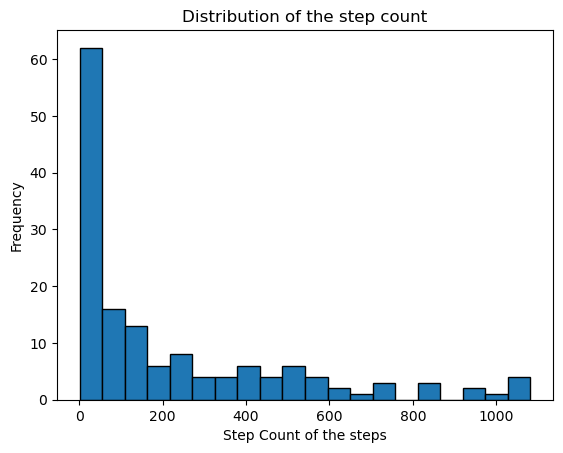

In [9]:
# Visualize data distribution (example: histogram of Step Count)
plt.hist(df['Step Count'], bins=20, edgecolor='k')
plt.xlabel('Step Count of the steps')
plt.ylabel('Frequency')
plt.title('Distribution of the step count')
plt.show()

In [10]:
# 3-- FEATURE ENGINEERING FOR MEANINGFULL INSIGHTS

In [15]:
# Step 3: Feature Engineering for Meaningful Insights
# Calculate daily distance covered, daily energy burned, and daily average step counts
daily_distance = df.groupby('Date')['Distance'].sum()
daily_energy_burned = df.groupby('Date')['Energy Burned'].sum()
daily_avg_step_count = df.groupby('Date')['Step Count'].sum()
daily_walking_speed = df.groupby('Date')['Walking Speed'].mean()


In [16]:
print(daily_distance)
print('----------------------------------ENERGY BURNED-------------------------------------------------')
print(daily_energy_burned)
print('---------------------------------STEP COUNT---------------------------------------')
print(daily_avg_step_count)

Date
2023-03-21    0.94847
2023-03-22    6.90782
2023-03-23    0.60637
2023-03-24    0.25240
2023-03-25    0.72672
2023-03-26    0.75636
2023-03-27    0.26131
2023-03-28    1.23272
2023-03-29    2.20180
2023-03-30    2.77743
2023-03-31    2.94432
2023-04-01    2.43079
Name: Distance, dtype: float64
----------------------------------ENERGY BURNED-------------------------------------------------
Date
2023-03-21    161.934
2023-03-22    454.747
2023-03-23    114.424
2023-03-24     91.612
2023-03-25    135.542
2023-03-26    203.545
2023-03-27    189.253
2023-03-28    178.247
2023-03-29    253.911
2023-03-30    145.606
2023-03-31    132.506
2023-04-01     98.865
Name: Energy Burned, dtype: float64
---------------------------------STEP COUNT---------------------------------------
Date
2023-03-21     1514
2023-03-22    10627
2023-03-23      873
2023-03-24      388
2023-03-25     1053
2023-03-26     1111
2023-03-27      391
2023-03-28     1965
2023-03-29     3222
2023-03-30     4226
2023-03-31

In [13]:
# 4--VISUALIZATION OF COMMUNICATION


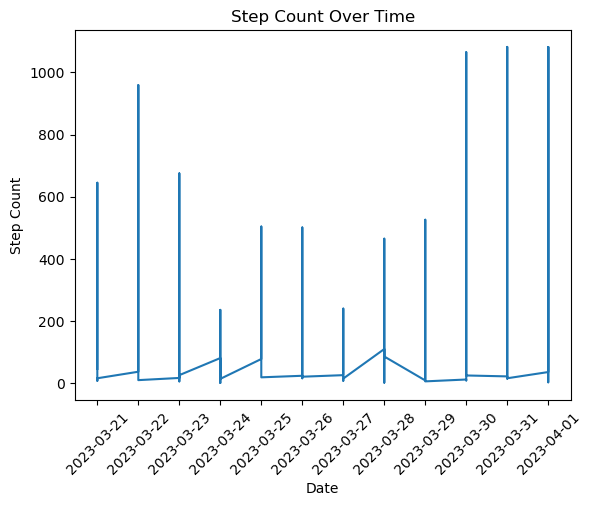

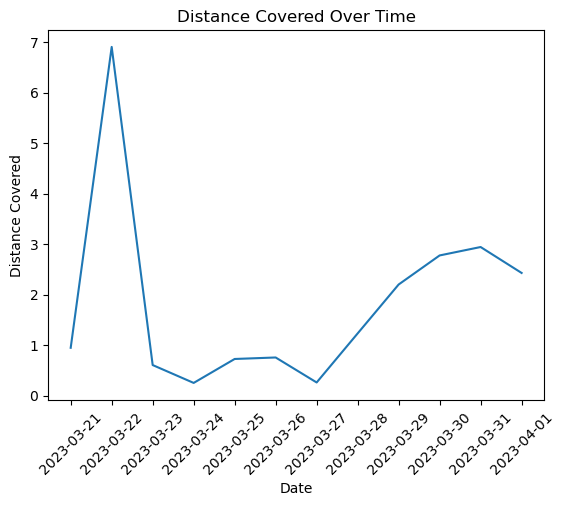

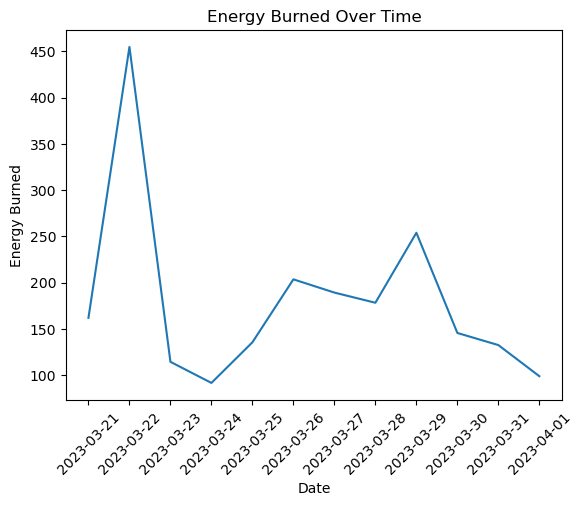

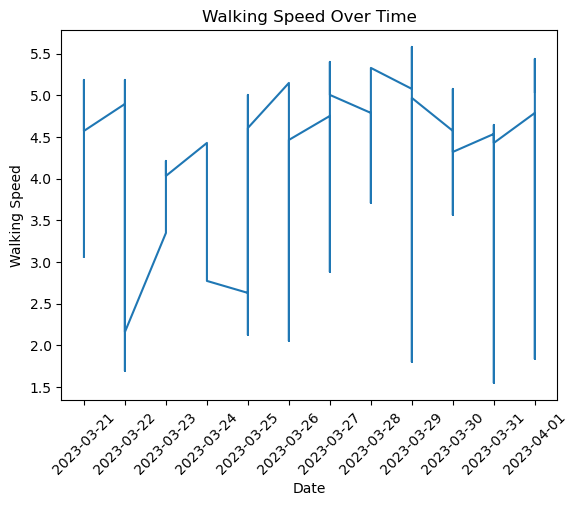

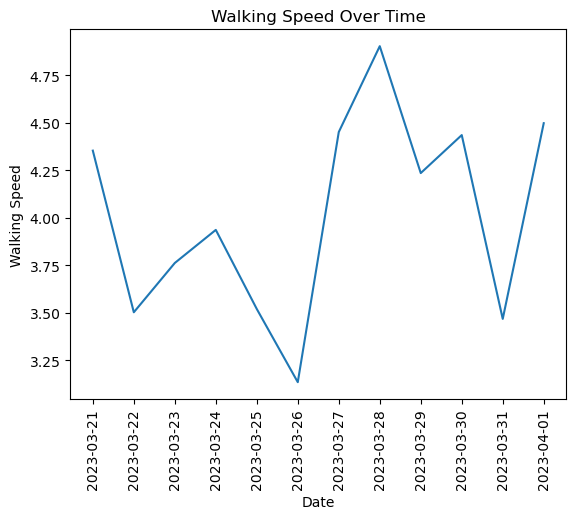

In [21]:

# Line chart for step count over time
plt.plot(df['Date'], df['Step Count'])
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count Over Time')
plt.xticks(rotation=45)
plt.show()

# Line chart for distance covered over time
plt.plot(daily_distance.index, daily_distance.values)
plt.xlabel('Date')
plt.ylabel('Distance Covered')
plt.title('Distance Covered Over Time')
plt.xticks(rotation=45)
plt.show()

# Line chart for energy burned over time
plt.plot(daily_energy_burned.index, daily_energy_burned.values)
plt.xlabel('Date')
plt.ylabel('Energy Burned')
plt.title('Energy Burned Over Time')
plt.xticks(rotation=45)
plt.show()

# Line chart for walking speed over time (assuming you have a 'Walking Speed' column)
plt.plot(df['Date'], df['Walking Speed'])
plt.xlabel('Date')
plt.ylabel('Walking Speed')
plt.title('Walking Speed Over Time')
plt.xticks(rotation=45)
plt.show()

# Line chart for walking speed over time
plt.plot(daily_walking_speed.index, daily_walking_speed.values)
plt.xlabel('Date')
plt.ylabel('Walking Speed')
plt.title('Walking Speed Over Time')
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2023-03-21'),
  Text(1, 0, '2023-03-22'),
  Text(2, 0, '2023-03-23'),
  Text(3, 0, '2023-03-24'),
  Text(4, 0, '2023-03-25'),
  Text(5, 0, '2023-03-26'),
  Text(6, 0, '2023-03-27'),
  Text(7, 0, '2023-03-28'),
  Text(8, 0, '2023-03-29'),
  Text(9, 0, '2023-03-30'),
  Text(10, 0, '2023-03-31'),
  Text(11, 0, '2023-04-01')])

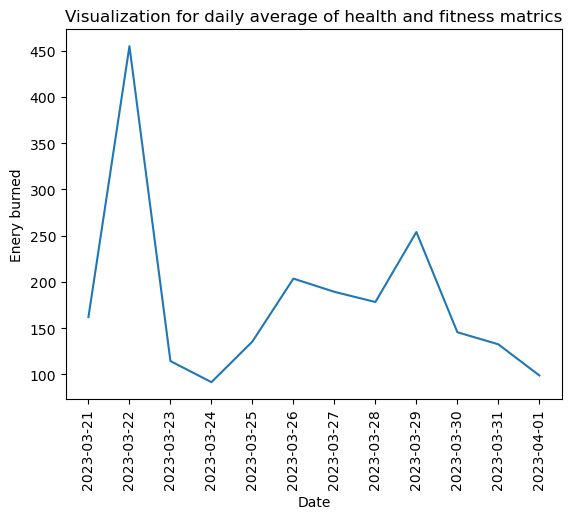

In [25]:
# •	Comparative visualizations for daily averages of health and fitness metrics.
plt.plot(daily_energy_burned.index, daily_energy_burned.values)
plt.xlabel('Date')
plt.ylabel('Enery burned')
plt.title('Visualization for daily average of health and fitness matrics')
plt.xticks(rotation=90)


In [28]:
df

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184
...,...,...,...,...,...,...,...,...
144,2023-04-01,16:04:23,87,0.05872,13.162,3,0.298,5.364
145,2023-04-01,16:33:18,37,0.02039,4.135,1,0.295,5.400
146,2023-04-01,16:49:49,969,0.65379,31.416,3,0.274,5.292
147,2023-04-01,17:09:06,640,0.42356,13.250,6,0.282,4.860
